In [2]:
data = read.csv('Du lieu cung cap/attitude.csv')

In [3]:
head(data)

,rating,complaints,privileges,learning,raises,critical,advance
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,43,51,30,39,61,92,45
2,63,64,51,54,63,73,47
3,71,70,68,69,76,86,48
4,61,63,45,47,54,84,35
5,81,78,56,66,71,83,47
6,43,55,49,44,54,49,34


In [4]:
is.na(data)

rating,complaints,privileges,learning,raises,critical,advance
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [5]:
str(data)

'data.frame':	30 obs. of  7 variables:
 $ rating    : int  43 63 71 61 81 43 58 71 72 67 ...
 $ complaints: int  51 64 70 63 78 55 67 75 82 61 ...
 $ privileges: int  30 51 68 45 56 49 42 50 72 45 ...
 $ learning  : int  39 54 69 47 66 44 56 55 67 47 ...
 $ raises    : int  61 63 76 54 71 54 66 70 71 62 ...
 $ critical  : int  92 73 86 84 83 49 68 66 83 80 ...
 $ advance   : int  45 47 48 35 47 34 35 41 31 41 ...


In [6]:
print(paste('Number of rows:', nrow(data)))
print(paste('Number of cols:', ncol(data)))

[1] "Number of rows: 30"
[1] "Number of cols: 7"


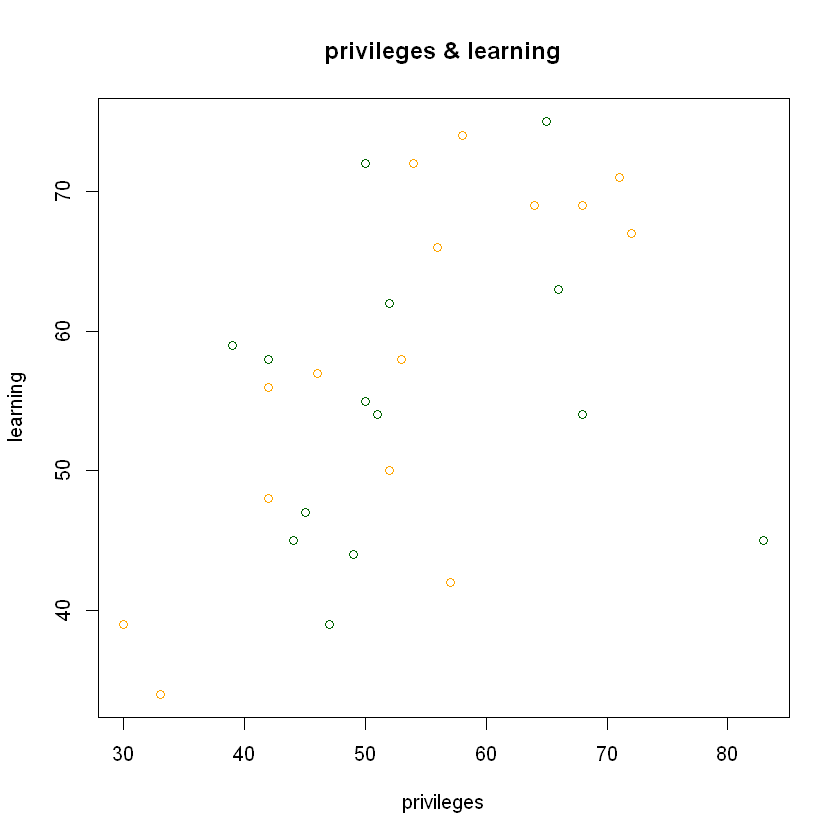

In [7]:
# Plot chart
plot(x = data$privileges, y = data$learning,
     xlab='privileges', ylab='learning',
     main = 'privileges & learning', col=c('orange','darkgreen'))

## Remarks:
- The data distribute in chaos
- As eyes observed, data could be cluster <= 6 groups

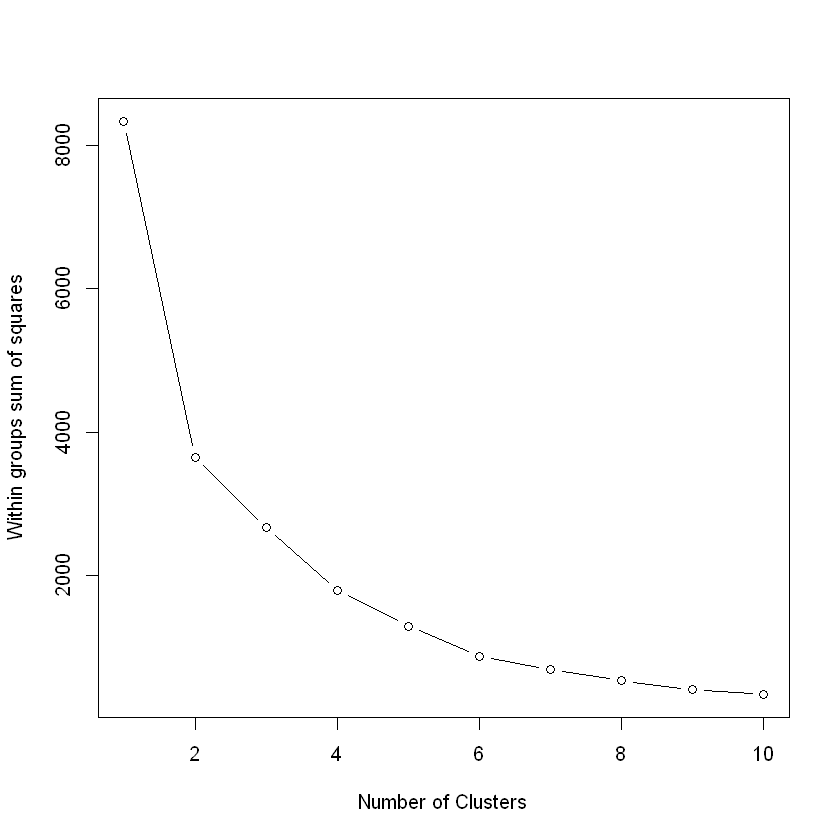

In [8]:
# Determine number of clusters
wss = (nrow(data)-1)-sum(apply(data,2,var))
for (i in 1:10) wss[i] = sum(kmeans(data[,3:4],
                                    centers=i, nstart = 20)$withinss)
plot(1:10, wss, type='b', xlab = 'Number of Clusters',
     ylab='Within groups sum of squares')

In [11]:
# clustering (k = 6)
set.seed(20)
dataCluster = kmeans(data[,3:4], centers = 6, nstart=20)
print(dataCluster)

K-means clustering with 6 clusters of sizes 6, 4, 8, 2, 2, 8

Cluster means:
  privileges learning
1   67.66667   69.000
2   54.50000   71.000
3   47.62500   45.250
4   31.50000   36.500
5   75.50000   49.500
6   46.87500   57.375

Clustering vector:
 [1] 4 6 1 3 2 3 6 6 1 3 6 3 3 5 2 2 1 1 6 5 4 6 3 6 3 1 2 3 1 6

Within cluster sum of squares by cluster:
[1] 133.3333  71.0000 255.3750  17.0000 153.0000 244.7500
 (between_SS / total_SS =  89.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [12]:
print('Centroid points:')
print(dataCluster$centers)

[1] "Centroid points:"
  privileges learning
1   67.66667   69.000
2   54.50000   71.000
3   47.62500   45.250
4   31.50000   36.500
5   75.50000   49.500
6   46.87500   57.375


In [14]:
str(dataCluster)

List of 9
 $ cluster     : Factor w/ 6 levels "1","2","3","4",..: 4 6 1 3 2 3 6 6 1 3 ...
 $ centers     : num [1:6, 1:2] 67.7 54.5 47.6 31.5 75.5 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:6] "1" "2" "3" "4" ...
  .. ..$ : chr [1:2] "privileges" "learning"
 $ totss       : num 8336
 $ withinss    : num [1:6] 133 71 255 17 153 ...
 $ tot.withinss: num 874
 $ betweenss   : num 7462
 $ size        : int [1:6] 6 4 8 2 2 8
 $ iter        : int 3
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [18]:
# Determine which sample belongs to its group
data_new = data.frame(x=data$privileges, y=data$learning)

clusters = function(x, centers){
    # compute squared euclidean distance from each sample to each cluster center
    tmp = sapply(seq_len(nrow(x)),
                function(i) apply(centers, 1, function(v) sum((x[i,]-v)^2)))
    max.col(-t(tmp)) # find index of mindistance
}
new = clusters(data_new, dataCluster[['centers']]) 
new                                  

[1] 4 6 1 3 2 3 6 6 1 3 6 3 3 5 2 2 1 1 6 5 4 6 3 6 3 1 2 3 1 6

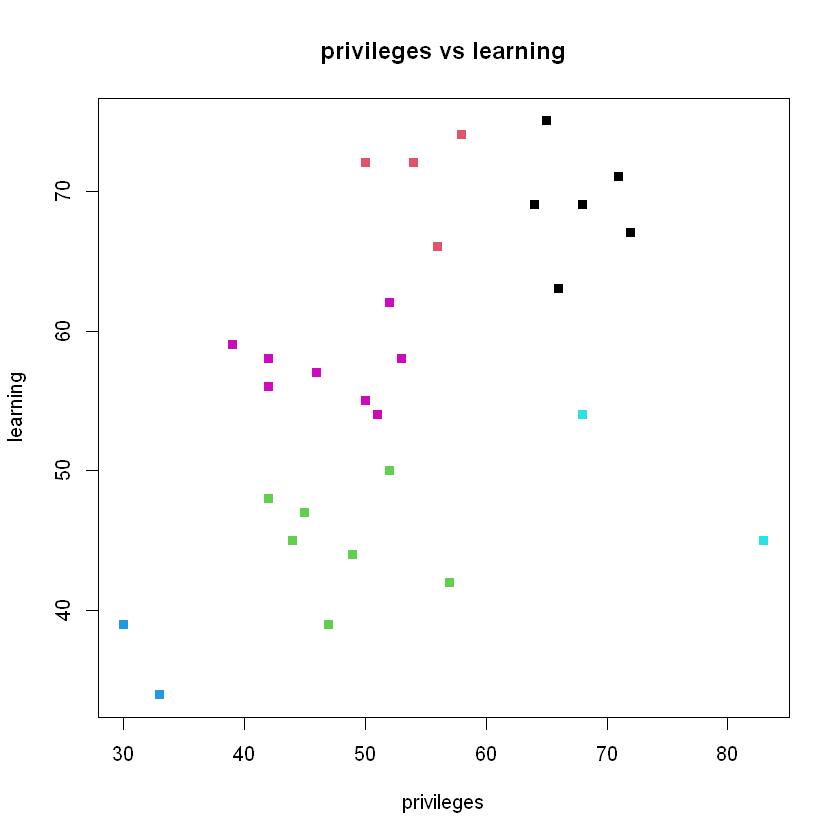

In [15]:
# Plot the chart
dataCluster$cluster = as.factor(dataCluster$cluster)
plot(x=data$privileges, y=data$learning,
     xlab='privileges', ylab='learning',
     main="privileges vs learning",col=dataCluster$cluster, pch=15)

## Remarks:
- There are 6 groups in total
- Group 1: centroid(67.66667, 69.000), privileges around 64 to 72, learning around 62 to 75
- Group 2: centroid(54.50000, 71.000), privileges around 50 to 60, learning around 65 to 73
- Group 3: centroid(47.62500, 45.250), privileges around 42 to 58, learning around 38 to 49
- Group 4: centroid(31.50000, 36.500), privileges around 30 to 32, learning around 10 to 38
- Group 5: centroid(75.50000, 49.500), privileges around 68 to 84, learning around 45 to 53
- Group 6: centroid(46.87500, 57.375), privileges around 40 to 54, learning around 53 to 62

In [16]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



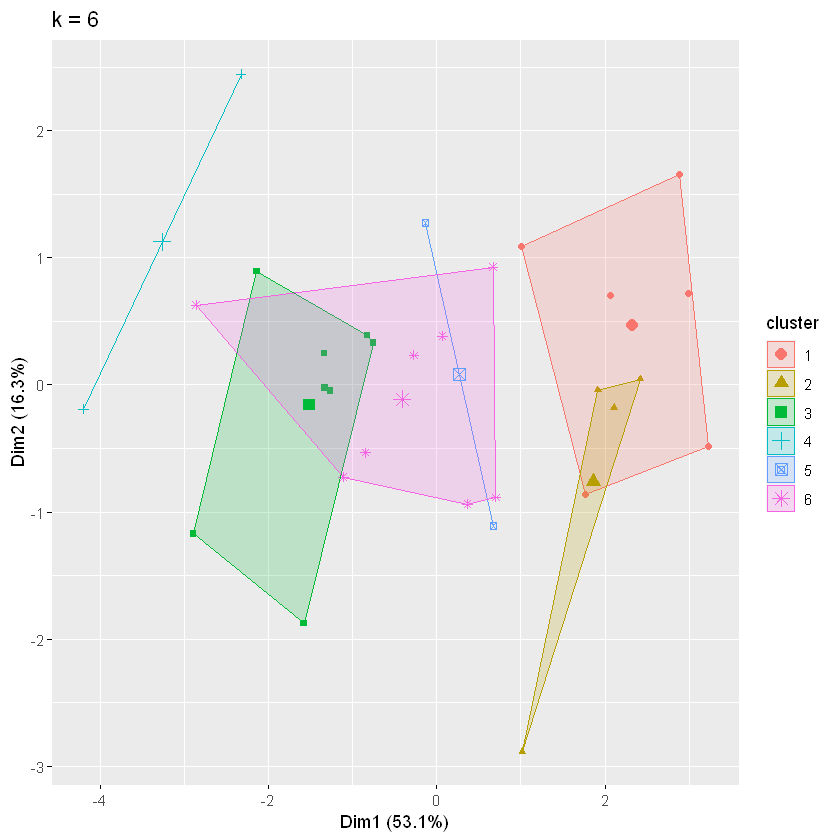

In [17]:
fviz_cluster(dataCluster, geom='point', data=data) +
ggtitle('k = 6')